## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2
from keras.layers import BatchNormalization, Activation
def build_mlp(input_shape, num_output=10, num_neurons = [512,256,128,64], L1_ratio=0.01, L2_ratio=0.01):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i , neurons in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=neurons,
                                   name=f"Hidden_layer_{i+1}",
                                   kernel_regularizer = l1_l2(l1=L1_ratio, l2=L2_ratio))(input_layer)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)
        else:
            x = keras.layers.Dense(units=neurons,
                                   name=f"Hidden_layer_{i+1}",
                                   kernel_regularizer = l1_l2(l1=L1_ratio, l2=L2_ratio))(x)
            x = BatchNormalization()(x)
            x = Activation("relu")(x)            
    
    out = keras.layers.Dense(units=num_output,
                             activation="softmax",
                             name = "Output_layer")(x)
    model = keras.models.Model(inputs=input_layer,outputs=out)
            
    return model

In [ ]:
"""Code Here
設定超參數
"""



In [6]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(x_train.shape[1:])
#ADAM = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.fit(x_train,y_train,
          batch_size=256,
          epochs=50,
          validation_data=(x_test,y_test),
          shuffle=True)

train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

results={"train_loss":train_loss,
         "val_loss":val_loss,
         "train_acc":train_acc,
         "val_acc":val_acc}

Epoch 1/50
196/196 [==============================] - 8s 32ms/step - loss: 53.0776 - accuracy: 0.2776 - val_loss: 6.6893 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 7s 34ms/step - loss: 5.2041 - accuracy: 0.3029 - val_loss: 5.1077 - val_accuracy: 0.1571
Epoch 3/50
196/196 [==============================] - 6s 29ms/step - loss: 4.7428 - accuracy: 0.3283 - val_loss: 5.1641 - val_accuracy: 0.2168
Epoch 4/50
196/196 [==============================] - 6s 30ms/step - loss: 4.6322 - accuracy: 0.3423 - val_loss: 5.1618 - val_accuracy: 0.1865
Epoch 5/50
196/196 [==============================] - 5s 27ms/step - loss: 4.7329 - accuracy: 0.3364 - val_loss: 5.1152 - val_accuracy: 0.1889
Epoch 6/50
196/196 [==============================] - 5s 27ms/step - loss: 4.4936 - accuracy: 0.3473 - val_loss: 4.7521 - val_accuracy: 0.2583
Epoch 7/50
196/196 [==============================] - 6s 29ms/step - loss: 4.5238 - accuracy: 0.3456 - val_loss: 5.0806 - val_accuracy: 0.183

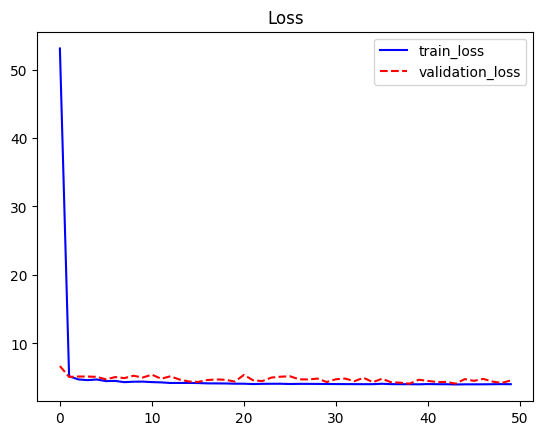

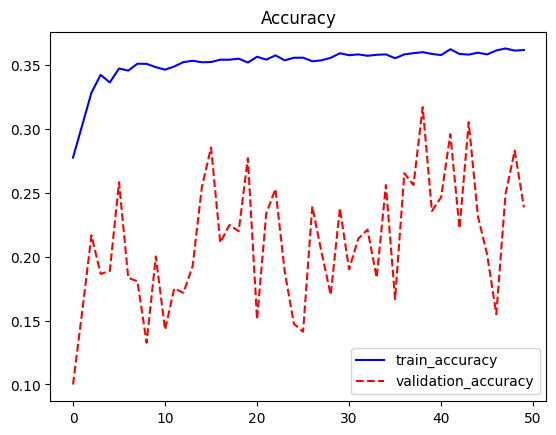

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(results["train_loss"])),results["train_loss"],"-",label="train_loss",c="b")
plt.plot(range(len(results["val_loss"])),results["val_loss"],"--",label="validation_loss",c="r")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(range(len(results["train_acc"])),results["train_acc"],"-",label="train_accuracy",c="b")
plt.plot(range(len(results["val_acc"])),results["val_acc"],"--",label="validation_accuracy",c="r")
plt.title("Accuracy")
plt.legend()
plt.show()
